# Housing Prices

### Load libraries

In [16]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error
import os
from sklearn.preprocessing import OneHotEncoder

### Load data

In [17]:
print(os.getcwd())  # Muestra la ruta donde se está ejecutando el script

df_raw = pd.read_csv("../data/train.csv")  # Ir un nivel atrás y luego a 'data'
df_raw.head()



/Users/sofiagerard/Github/ITAM/tarea02_housing_sgr/notebooks


,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
1,2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500
2,3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500
3,4,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000
4,5,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,12,2008,WD,Normal,250000


In [18]:
df_raw.size

118260

In [19]:
# info
df_raw.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1460 entries, 0 to 1459
Data columns (total 81 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Id             1460 non-null   int64  
 1   MSSubClass     1460 non-null   int64  
 2   MSZoning       1460 non-null   object 
 3   LotFrontage    1201 non-null   float64
 4   LotArea        1460 non-null   int64  
 5   Street         1460 non-null   object 
 6   Alley          91 non-null     object 
 7   LotShape       1460 non-null   object 
 8   LandContour    1460 non-null   object 
 9   Utilities      1460 non-null   object 
 10  LotConfig      1460 non-null   object 
 11  LandSlope      1460 non-null   object 
 12  Neighborhood   1460 non-null   object 
 13  Condition1     1460 non-null   object 
 14  Condition2     1460 non-null   object 
 15  BldgType       1460 non-null   object 
 16  HouseStyle     1460 non-null   object 
 17  OverallQual    1460 non-null   int64  
 18  OverallC

In [20]:
df_raw.isnull().sum()[df_raw.isnull().sum().gt(0)]

LotFrontage      259
Alley           1369
MasVnrType       872
MasVnrArea         8
BsmtQual          37
BsmtCond          37
BsmtExposure      38
BsmtFinType1      37
BsmtFinType2      38
Electrical         1
FireplaceQu      690
GarageType        81
GarageYrBlt       81
GarageFinish      81
GarageQual        81
GarageCond        81
PoolQC          1453
Fence           1179
MiscFeature     1406
dtype: int64

# 📌 Acerca de los Datos

- Hay **1460 observaciones**.
- Hay **80 características** + `id`.

## 🔍 Valores Nulos:

- `PoolQC`: Un valor `nan` indica que no hay piscina, por lo que puede imputarse con `'None'`.
- `Fence`: Mismo caso que `PoolQC`, puede imputarse con `'None'`.
- `MiscFeature`: Se puede imputar con `'None'`.
- `Alley`: Se puede imputar con `'None'`.
- `MasVnrType`: Se puede imputar con `'None'`.
- `FireplaceQu`: Se puede imputar con `'None'`.
- `GarageType`: Se puede imputar con `'None'`.
- `GarageFinish`: Se puede imputar con `'None'`.
- `GarageYrBlt`: Se puede imputar con `'None'`.
- `BsmtQual`: Se puede imputar con `'None'`.
- `BsmtCond`: Se puede imputar con `'None'`.
- `BsmtExposure`: Se puede imputar con `'None'`.
- `BsmtFinType1`: Se puede imputar con `'None'`.

---

## 🎯 Características más importantes según conocimiento previo: 
### 🏗️ **Construcción y Dimensiones**
- **Año de Construcción (`YearBuilt`)**:
  - Edad de la casa:  
    `age = HOY - MAX(YearBuilt, YearRemodAdd)`.
- **Área total (`Square Feats`)**:
  - Tamaño del terreno: `LotArea`.
  - Área construida: `GrLivArea`.
  - Área de porches:  
    `OpenPorchSF + EnclosedPorch + 3SsnPorch + ScreenPorch`.

### 💰 **Venta**
- **Precio de venta (`SalePrice`)**.
- **Tiempo de venta (`YrSold`)**.
- **Tipo de venta (`SaleType`)**.
- **Condición de venta (`SaleCondition`)**.

### 📍 **Ubicación**
- **Barrio (`Neighborhood`)**.
- **Configuración del lote (`LotConfig`)**.

### 📈 **Propiedades comparables**
- **Precio de otras propiedades similares**.

### 🚽 **Características Interiores**
- **Baños (`Bathrooms + HalfBath`)**.
- **Total de habitaciones (`TotRmsAbvGrd`)**.
- **Área construida (`GrLivArea`)**.
- **Tamaño del terreno (`LotArea`)**.
- **Año de construcción (`YearBuilt`)**.
- **Amenidades (`Amenities`)**.
- **Características de lujo (`Luxury Features`)**.

### 🏠 **Estructura y Tipo de Propiedad**
- **Altura**:
  - **Pisos construidos**:  
    `1stFlrSF` + `2ndFlrSF`.
- **Tipo de propiedad**:
  - **Estilo de la casa (`HouseStyle`)**.
  - **Tipo de edificio (`BldgType`)**.
  - **Zonificación (`MSZoning`)**.
  - **Clase (`MSSubClass`)**.

In [21]:
# columnas relevantes
cols2stay = [
    'Id', 'SalePrice',    
    'YearBuilt', 'YearRemodAdd', 
    'LotArea', 'GrLivArea', 
    'OpenPorchSF', 'EnclosedPorch', '3SsnPorch', 'ScreenPorch', 
    'YrSold', 'MoSold',
    'SaleType', 'SaleCondition', 
    'Neighborhood', 'MSZoning',
    'FullBath',  'HalfBath', 'TotRmsAbvGrd',
    'PoolArea', 'OverallQual', 'OverallCond',
    'HouseStyle', 'BldgType'
]

# df with important columns
df = df_raw[cols2stay].copy()
df

,Id,SalePrice,YearBuilt,YearRemodAdd,LotArea,GrLivArea,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,...,Neighborhood,MSZoning,FullBath,HalfBath,TotRmsAbvGrd,PoolArea,OverallQual,OverallCond,HouseStyle,BldgType
0,1,208500,2003,2003,8450,1710,61,0,0,0,...,CollgCr,RL,2,1,8,0,7,5,2Story,1Fam
1,2,181500,1976,1976,9600,1262,0,0,0,0,...,Veenker,RL,2,0,6,0,6,8,1Story,1Fam
2,3,223500,2001,2002,11250,1786,42,0,0,0,...,CollgCr,RL,2,1,6,0,7,5,2Story,1Fam
3,4,140000,1915,1970,9550,1717,35,272,0,0,...,Crawfor,RL,1,0,7,0,7,5,2Story,1Fam
4,5,250000,2000,2000,14260,2198,84,0,0,0,...,NoRidge,RL,2,1,9,0,8,5,2Story,1Fam
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1455,1456,175000,1999,2000,7917,1647,40,0,0,0,...,Gilbert,RL,2,1,7,0,6,5,2Story,1Fam
1456,1457,210000,1978,1988,13175,2073,0,0,0,0,...,NWAmes,RL,2,0,7,0,6,6,1Story,1Fam
1457,1458,266500,1941,2006,9042,2340,60,0,0,0,...,Crawfor,RL,2,0,9,0,7,9,2Story,1Fam
1458,1459,142125,1950,1996,9717,1078,0,112,0,0,...,NAmes,RL,1,0,5,0,5,6,1Story,1Fam


In [22]:
# info
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1460 entries, 0 to 1459
Data columns (total 24 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   Id             1460 non-null   int64 
 1   SalePrice      1460 non-null   int64 
 2   YearBuilt      1460 non-null   int64 
 3   YearRemodAdd   1460 non-null   int64 
 4   LotArea        1460 non-null   int64 
 5   GrLivArea      1460 non-null   int64 
 6   OpenPorchSF    1460 non-null   int64 
 7   EnclosedPorch  1460 non-null   int64 
 8   3SsnPorch      1460 non-null   int64 
 9   ScreenPorch    1460 non-null   int64 
 10  YrSold         1460 non-null   int64 
 11  MoSold         1460 non-null   int64 
 12  SaleType       1460 non-null   object
 13  SaleCondition  1460 non-null   object
 14  Neighborhood   1460 non-null   object
 15  MSZoning       1460 non-null   object
 16  FullBath       1460 non-null   int64 
 17  HalfBath       1460 non-null   int64 
 18  TotRmsAbvGrd   1460 non-null

# Objective Variable: SalePrice

Text(163000.01, 100, 'Median: 163000.00')

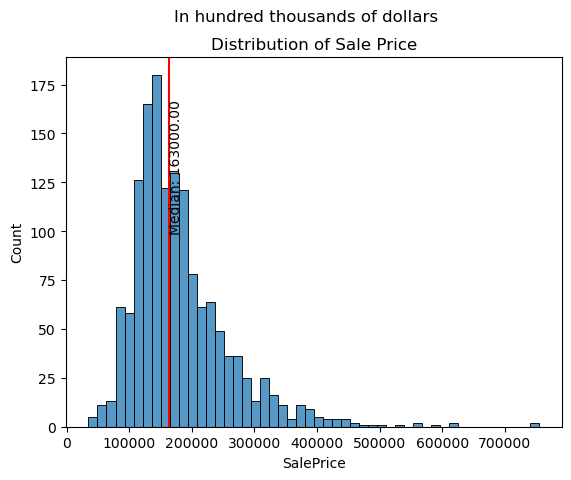

In [23]:
# plot distribution of sale price using seaborn
sns.histplot(data=df, x='SalePrice', bins=50)

# titles
plt.title('Distribution of Sale Price')
# subtitle
plt.suptitle('In hundred thousands of dollars')

# add median line with text
median = df['SalePrice'].median()
plt.axvline(median, color='red')
plt.text(median + 0.01, 100, f'Median: {median:.2f}', rotation=90)

In [24]:
# describe
df['SalePrice'].describe()

count      1460.000000
mean     180921.195890
std       79442.502883
min       34900.000000
25%      129975.000000
50%      163000.000000
75%      214000.000000
max      755000.000000
Name: SalePrice, dtype: float64

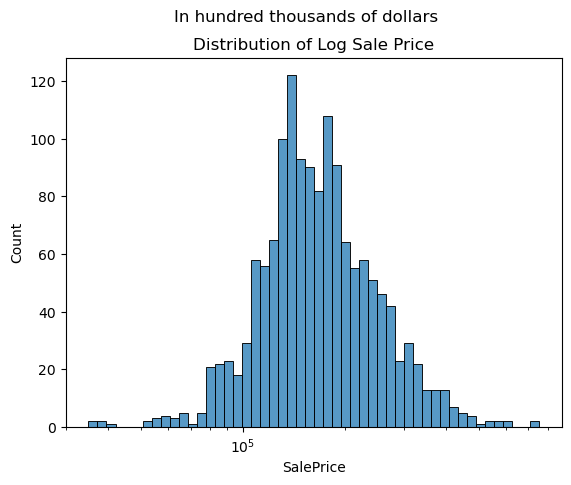

In [25]:
# plot distribution of log of sale price using seaborn, only scale it at the last
sns.histplot(data=df, x='SalePrice', bins=50, log_scale=True)

# titles
plt.title('Distribution of Log Sale Price')
# subtitle
plt.suptitle('In hundred thousands of dollars')

# log x axis
plt.xscale('log')

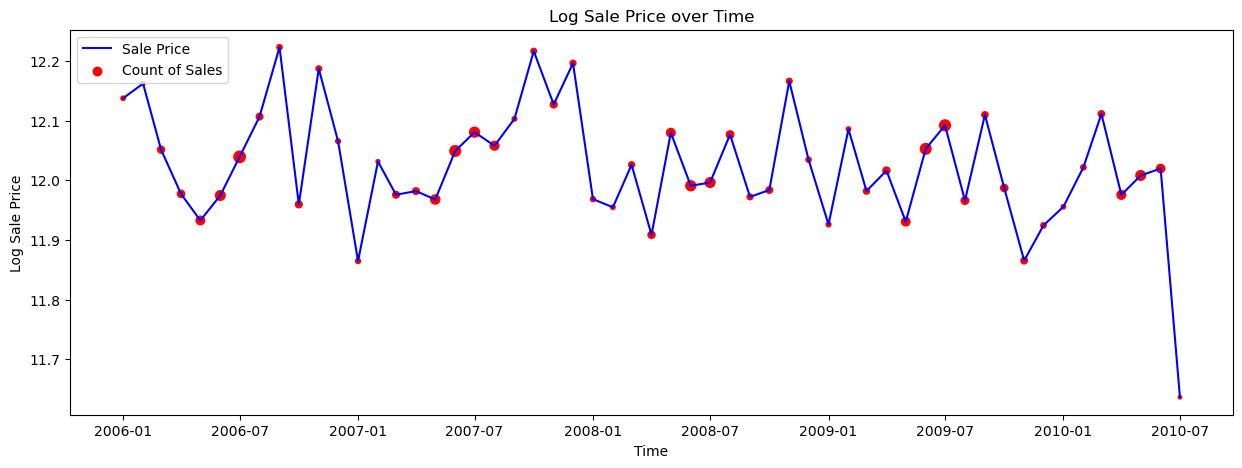

In [26]:
# timeseries plot
df_price_ts = (
    df
    .assign(logprice = lambda x: np.log(x['SalePrice']))
    .groupby(['YrSold', 'MoSold'])
    .agg({'logprice': 'mean', 'Id': 'count'})
    .reset_index()
)
# plot timeseries

# first index as year and month in datetime format
df_price_ts.index = pd.to_datetime(df_price_ts['YrSold'].astype(str) + '-' + df_price_ts['MoSold'].astype(str))

# plot as line & buble 
fig, ax = plt.subplots(figsize=(15, 5))
ax.plot(df_price_ts['logprice'], color='blue', label='Sale Price')
ax.scatter(df_price_ts.index, df_price_ts['logprice'], s=df_price_ts['Id'], color='red', label='Count of Sales')
ax.set_xlabel('Time')
ax.set_ylabel('Log Sale Price')
ax.set_title('Log Sale Price over Time')

# add legend
ax.legend(loc='upper left')
plt.show()

In [27]:
# Resumen de variables categóricas
df.describe(include=['object'])


,SaleType,SaleCondition,Neighborhood,MSZoning,HouseStyle,BldgType
count,1460,1460,1460,1460,1460,1460
unique,9,6,25,5,8,5
top,WD,Normal,NAmes,RL,1Story,1Fam
freq,1267,1198,225,1151,726,1220


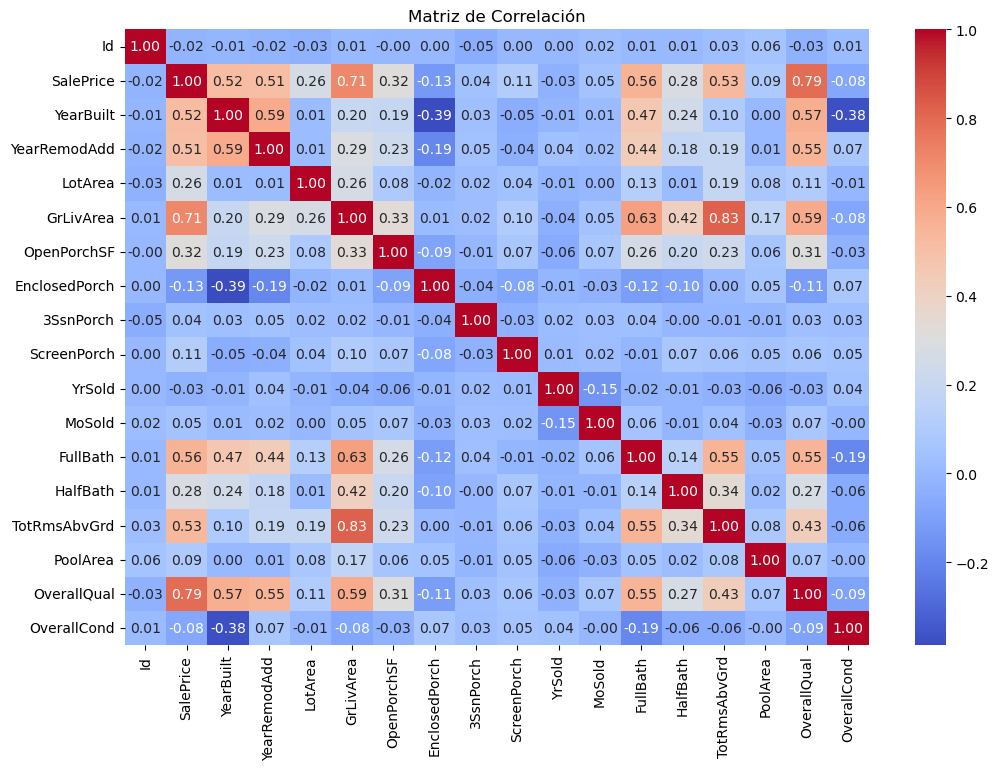

In [28]:
plt.figure(figsize=(12, 8))
sns.heatmap(df.select_dtypes(include=['number']).corr(), cmap="coolwarm", annot=True, fmt=".2f")
plt.title("Matriz de Correlación")
plt.show()



In [29]:
correlation = df.select_dtypes(include=['number']).corr()["SalePrice"].sort_values(ascending=False)
print(correlation.head(15))



SalePrice       1.000000
OverallQual     0.790982
GrLivArea       0.708624
FullBath        0.560664
TotRmsAbvGrd    0.533723
YearBuilt       0.522897
YearRemodAdd    0.507101
OpenPorchSF     0.315856
HalfBath        0.284108
LotArea         0.263843
ScreenPorch     0.111447
PoolArea        0.092404
MoSold          0.046432
3SsnPorch       0.044584
Id             -0.021917
Name: SalePrice, dtype: float64


In [30]:
# Imputación de valores nulos en variables categóricas
categorical_na = ["PoolQC", "Fence", "MiscFeature", "Alley", "MasVnrType", 
                  "FireplaceQu", "GarageType", "GarageFinish", "GarageYrBlt", 
                  "BsmtQual", "BsmtCond", "BsmtExposure", "BsmtFinType1"]

for col in categorical_na:
    df_raw[col].fillna("None", inplace=True)

# Imputación de valores nulos en variables numéricas con la mediana
numerical_na = ["LotFrontage", "GarageYrBlt", "MasVnrArea", "TotalBsmtSF"]

for col in numerical_na:
    df_raw[col] = pd.to_numeric(df_raw[col], errors='coerce')  # Asegurar tipo numérico
    df_raw[col].fillna(df_raw[col].median(), inplace=True)


/var/folders/8v/p9jmdytd6y36kdsq55l4_cqw0000gn/T/ipykernel_29291/3480745022.py:7: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df_raw[col].fillna("None", inplace=True)
/var/folders/8v/p9jmdytd6y36kdsq55l4_cqw0000gn/T/ipykernel_29291/3480745022.py:7: FutureWarning: Setting an item of incompatible dtype is deprecated and will raise an error in a future version of pandas. Value 'None' has dtype incompatible with float64, please explicitly cast to a compatible dtype first.
  df_raw[col].fillna("None", inplace=True)
/var/folders/8

In [31]:


# Aplicar One-Hot Encoding a variables categóricas
categorical_cols = ['SaleType', 'SaleCondition', 'Neighborhood', 'MSZoning', 'HouseStyle', 'BldgType']
df_encoded = pd.get_dummies(df_raw, columns=categorical_cols, drop_first=True)


In [32]:
# Crear variable de antigüedad de la casa
df_encoded["HouseAge"] = df_encoded["YrSold"] - df_encoded[["YearBuilt", "YearRemodAdd"]].max(axis=1)

# Crear variable de área total
df_encoded["TotalSF"] = df_encoded["GrLivArea"] + df_encoded["TotalBsmtSF"]

# Crear variable de baños totales (completos + medios)
df_encoded["TotalBath"] = df_encoded["FullBath"] + (df_encoded["HalfBath"] * 0.5)
